# Inteligência Artificial Computacional
Prática 1 AV1 - Modelo Preditivo 1 (Regressão Linear Múltipla)<br></br>
Professor: Prof. Msc. Paulo Cirillo Souza Barbosa

Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Funções auxiliares

In [8]:
def get_plot_configuration(file):
    fig = plt.figure(1)
    plot = fig.add_subplot(projection='3d')

    plot.scatter(
        file[:, 0],
        file[:, 1],
        file[:, 2],
        color='r'
    )

    plot.set_xlabel("Número Carbono")
    plot.set_ylabel("Peso Molecular")
    plot.set_zlabel("Nível de Solubilidade")
    plot.set_title("Solubilidade")

    return plot


### 1 - Dada as informações fornecidas, quais são os valores de N e p?

In [2]:
N = 951
p = 2

### 2 - A tarefa a ser resolvida pelo modelo, é de regressão ou classificação? Justifique.

Regressão, pois a variável depentente a ser predizida é quantitativa

### 3 - Carregue os dados com numpy utilizando o método np.loadtxt(), e em seguida plote o gráfico de espalhamento. Neste caso, tente fornecer ao gráfico, o máximo de informações (rótulos dos eixos x,y e z, título da imagem, cor diferente ao espalhamento...)

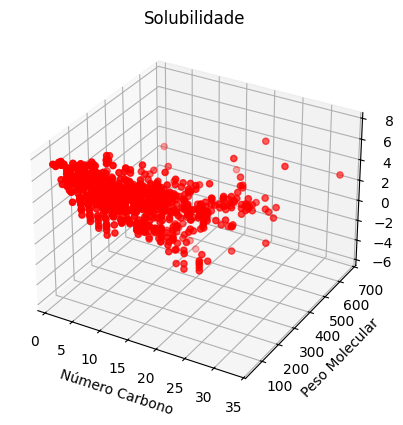

In [9]:
solubility_file = np.loadtxt("Solubilidade2.csv", delimiter=",")

plot = get_plot_configuration(solubility_file)
plt.show()


### 4 - Você deve projetar um sistema inteligente que aprende os padrões fornecidos, ou seja, que captura a relação entre (xnumeroCarbono, xpesoMolecular e ysolubilidade). Assim, pede-se que utilize hipóteses para os seguintes modelos:

##### 4.1 - A equação linear em que β1 até βp tem o valor nulo, e que tenha β0 um valor definido. A estimativa de ˆβ0 (algoritmo de aprendizagem) deve ser realizada via média dos valores da variável dependente (ou média da variável observável).

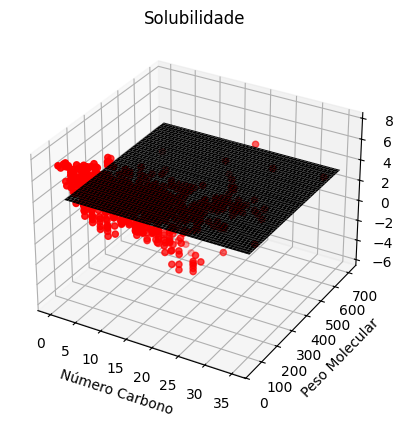

In [11]:
plot = get_plot_configuration(solubility_file)

mean = np.mean(solubility_file[:, 2])

x_axis = np.linspace(0, 35, 100)
y_axis = np.linspace(100, 706, 100)
X3d, Y3d = np.meshgrid(x_axis, y_axis)

B = [
    mean,
    0,
    0
]

Z = B[0] + B[1]*X3d + B[2]*Y3d

plot.plot_surface(X3d, Y3d, Z, cmap='gray')
plt.show()

##### 4.2 - A equação linear de regressão múltipla (que tenha todos seus parâmetros definidos, β0 até βp) e se faça a estimação de seus parâmetros (algoritmo de aprendizagem) via Método dos Mínimos Quadrados Ordinários (MMQO).

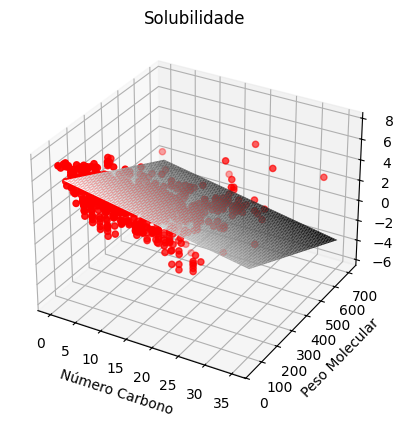

In [12]:
plot = get_plot_configuration(solubility_file)

x1 = solubility_file[:, 0:1]
x2 = solubility_file[:, 1:2]
y = solubility_file[:, 2:3]
ones = np.ones(shape=(N, 1))

X = np.concatenate((ones, x1, x2), axis=1)
B = np.linalg.inv(X.T@X)@X.T@y


x_axis = np.linspace(0, 35, 100)
y_axis = np.linspace(100, 706, 100)
X3d, Y3d = np.meshgrid(x_axis, y_axis)

Z = B[0] + B[1]*X3d + B[2]*Y3d

plot.plot_surface(X3d, Y3d, Z, cmap='gray')
plt.show()

### 5 - Após os modelos serem estimados, o cliente te forneceu uma única amostra sem nível de solubilidade. Essa entrada aos modelos desenvolvidos, trata-se do valor x1 = 11 e x2 = 190, 27. Para esses casos, qual é a predição de solubilidade realizada para cada modelo?

##### 5.1 - Primeiro Modelo

In [13]:
mean = np.mean(solubility_file[:, 2])

B = [
    mean,
    0,
    0
]

x1 = 11
x2 = 190.27

ans = B[0] + B[1]*x1 + B[2]*x2

print(ans)

3.2814300736067294


##### 5.2 - Segundo Modelo

In [14]:
x1_array = solubility_file[:, 0:1]
x2_array = solubility_file[:, 1:2]
y = solubility_file[:, 2:3]
ones = np.ones(shape=(N, 1))

X = np.concatenate((ones, x1_array, x2_array), axis=1)
B = np.linalg.inv(X.T@X)@X.T@y

x1 = 11
x2 = 190.27

ans = B[0] + B[1]*x1 + B[2]*x2

print(ans)

[3.28587634]
